In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from jupyterthemes.stylefx import set_nb_theme
set_nb_theme('gruvboxd')

In [2]:
scores = []

In [3]:
scores.append([0.5119047619047619,
 0.348639455782313,
 0.5663265306122449,
 0.5425170068027211,
 0.5850340136054422,
 0.6037414965986395,
 0.5714285714285714,
 0.5051020408163266,
 0.6139455782312925])

In [4]:
scores.append([0.48282142857142857,
 0.4683452380952381,
 0.4593214285714285,
 0.6264166666666666,
 0.5092500000000001,
 0.4187857142857143,
 0.46214285714285713,
 0.4798809523809524,
 0.5012619047619047])

In [5]:
scores.append([0.39875283446712023,
 0.44937641723356014,
 0.6773242630385488,
 0.30657596371882084,
 0.42091836734693877,
 0.4277777777777778,
 0.4727324263038549,
 0.4678004535147392,
 0.5741496598639456])

In [6]:
scores.append([0.5083333333333334,
 0.61875,
 0.6,
 0.7354166666666667,
 0.7354166666666668,
 0.6479166666666667,
 0.6895833333333334,
 0.7520833333333334,
 0.7083333333333335])

In [7]:
scores.append([0.934761111111111,
 0.880770634920635,
 0.5222190476190476,
 0.3338007936507937,
 0.4122746031746031,
 0.4592055555555556,
 0.5665746031746032,
 0.5917730158730159,
 0.5773484126984126])

In [8]:
scores.append([0.5083333333333334,
 0.61875,
 0.6,
 0.7354166666666667,
 0.7354166666666668,
 0.6479166666666667,
 0.6895833333333334,
 0.7520833333333334,
 0.7083333333333335])

In [ ]:
scores.append([0.8143690476190476,
 0.8376190476190477,
 0.48159523809523813,
 0.5231785714285714,
 0.4836785714285714,
 0.4928452380952381,
 0.47276190476190477,
 0.44242857142857145,
 0.47530952380952385])

In [ ]:
scores.append([0.7100952380952381,
 0.5427301587301587,
 0.4896190476190476,
 0.4823412698412698,
 0.4712936507936508,
 0.518547619047619,
 0.5011666666666668,
 0.5268809523809523,
 0.5319126984126984])

In [13]:
scores.append([0.7851851851851852,
 0.5189236111111112,
 0.48871527777777773,
 0.5327546296296296,
 0.47413194444444445,
 0.5094328703703704,
 0.4906249999999999,
 0.4751736111111111,
 0.5001157407407407])

In [10]:
scores_df = pd.DataFrame(
    data=scores, 
    columns=['2-19Hz', '-32Hz', '44Hz','57Hz','69Hz','82Hz','92Hz','107Hz','120Hz'])

In [11]:
scores_df

,2-19Hz,-32Hz,44Hz,57Hz,69Hz,82Hz,92Hz,107Hz,120Hz
0,0.511905,0.348639,0.566327,0.542517,0.585034,0.603741,0.571429,0.505102,0.613946
1,0.482821,0.468345,0.459321,0.626417,0.509250,0.418786,0.462143,0.479881,0.501262
2,0.398753,0.449376,0.677324,0.306576,0.420918,0.427778,0.472732,0.467800,0.574150
3,0.508333,0.618750,0.600000,0.735417,0.735417,0.647917,0.689583,0.752083,0.708333
4,0.934761,0.880771,0.522219,0.333801,0.412275,0.459206,0.566575,0.591773,0.577348
5,0.508333,0.618750,0.600000,0.735417,0.735417,0.647917,0.689583,0.752083,0.708333
6,0.785185,0.518924,0.488715,0.532755,0.474132,0.509433,0.490625,0.475174,0.500116


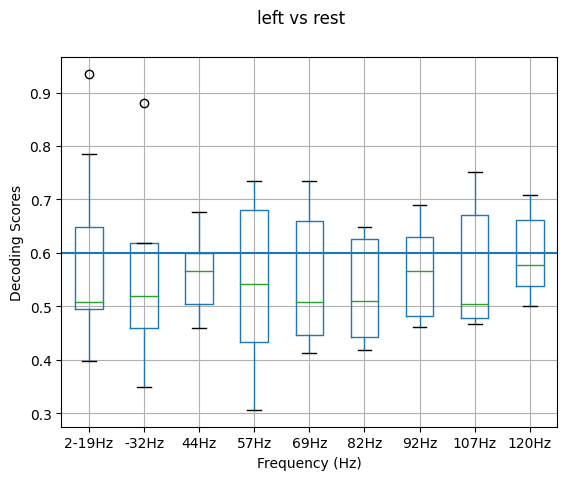

In [12]:
csp_fig, axes = plt.subplots(1)
scores_df.boxplot(ax=axes)
axes.axhline(0.6)
axes.set_xlabel('Frequency (Hz)')
axes.set_ylabel('Decoding Scores')
csp_fig.suptitle('left vs rest')
plt.show()